Accuracy: 98.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.97      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



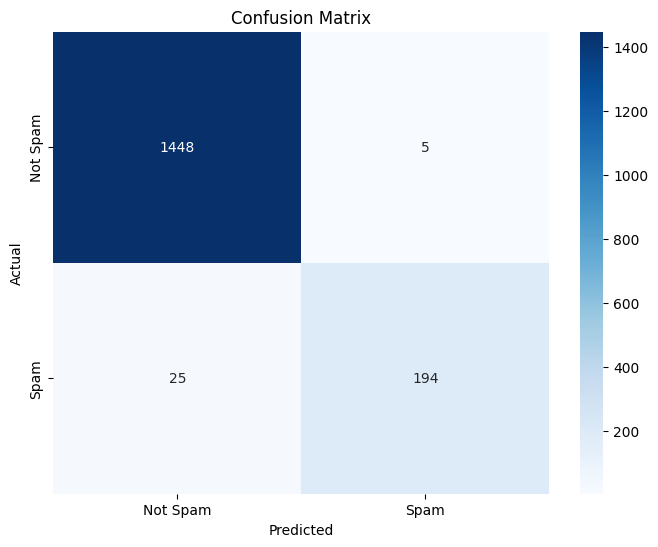

In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with 'latin-1' encoding
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Selecting only relevant columns

# Rename columns for better readability
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Predictions on the test set
y_pred = naive_bayes.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
